In [1]:
import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random
import emcee
import corner


In [33]:
dt = pd.read_table('1315/2014_Obs/lightcurve/2M1315_2014-LLRR.dat')
ll = pd.read_table('1315/2014_Obs/lightcurve/2M1315_2014-LL.dat')
rr = pd.read_table('1315/2014_Obs/lightcurve/2M1315_2014-RR.dat')

LOW = pd.read_table('1315/2014_Obs/lightcurve/2M1315_2014-5GHz.dat')
HIGH = pd.read_table('1315/2014_Obs/lightcurve/2M1315_2014-7GHz.dat')



In [34]:
bins = 600
binned = binning(dt,bins)
LL = binning(ll,bins)
RR = binning(rr,bins)
low = binned(LOW,bins)
high = binned(HIGH,bins)

stV = (RR['re']-LL['re'])*0.5
stErr = np.sqrt(RR['ure']**2+LL['ure']**2)*.5


/home/russell/projects/radio_project/radioReduction.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


NameError: name 'LOW' is not defined

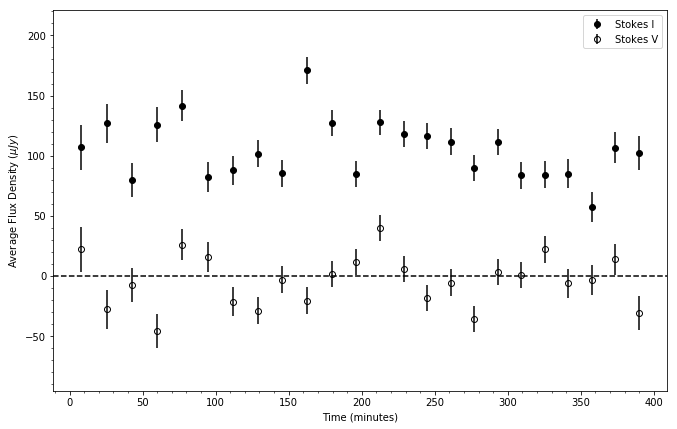

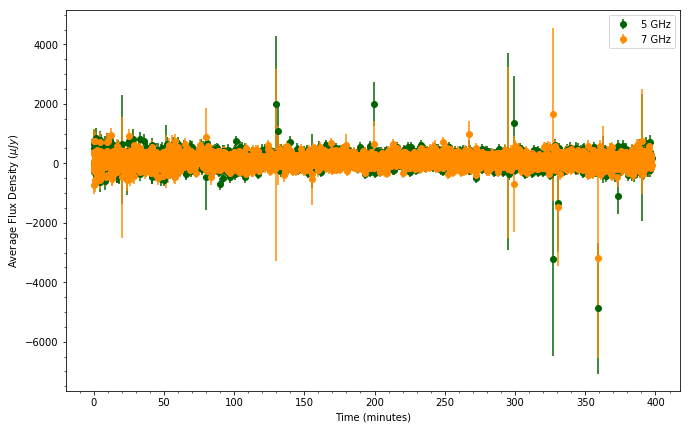

In [35]:
plt.figure(figsize=(11,7))
plt.errorbar(binned['dtmin'],binned['re'],yerr=binned['ure'],color='k',linestyle='None',fmt='o',label='Stokes I')
plt.errorbar(RR['dtmin'],stV,yerr=stErr,color='k',marker='o',markerfacecolor='None',linestyle='none',label='Stokes V')
plt.axhline(y=0,color='k',linestyle='dashed')
plt.legend(loc='best')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Flux Density ($\mu Jy$)')
plt.ylim(np.min(stV)-50,np.max(binned['re'])+50)
plt.minorticks_on()
plt.show()

plt.figure(figsize=(11,7))
plt.errorbar(low['dtmin'],low['re'],yerr=low['ure'],color='darkgreen',fmt='o',linestyle='None',label='5 GHz')
plt.errorbar(high['dtmin'],high['re'],yerr=high['ure'],color='darkorange',fmt='o',linestyle='None',label='7 GHz')
plt.legend(loc='best')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Flux Density ($\mu Jy$)')
plt.minorticks_on()
plt.show()


In [15]:
avg = meanData(dt)

In [16]:
avg

(56430.18422131339, 104.83279469731491, 2.427647546173375)